In [63]:
#Importing the libraries


#For mathematical calculations
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns

#For plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline


#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Reading the data


train = pd.read_csv(r"C:\Users\Lonakshi Bhagat\Desktop\projects\loan_train.csv")
test = pd.read_csv(r"C:\Users\Lonakshi Bhagat\Desktop\projects\loan_test.csv")


train_original = train.copy()
test_original = test.copy()

<h3> Understanding the Data </h3>

<h4> In this section we will lokk at the structure of the train and test datasets.
Firstly, we will check the features present in our data and then we will look at their data types
</h4>

In [3]:
#column names in train.csv file
#It contains all the independent variables and the target variable that is Loan_Status

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
#column names in test.csv file
#As you can see that there is no target column(Loan_Status) in test.csv file

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<h4> We have similar features in the test dataset as the train dataset except the Loan_Status.
    
We will predict the Loan_Status using the model built using the train data (train file will be used to predict loan_status)
</h4>

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

<h3> Univariate Analysis </h3>

It is the simplest form of analyzing data where we examine each variable individually.

For <b>categorical </b> features we can use frequency table or barplots which will calculate the number of each category in particular variable.
    
For <b> numerical features </b> probability density plots can be used to look at the distribution of the variable. 
    
    

<h3> Target Variable </h3>

We will first look at the target variable that is Loan_Status.
Frequency table of variable will give us the cont of each category in that Loan_status variable

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#Normalise can be set to rue to print proportons instead of number

train['Loan_Status'].value_counts(normalize= True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

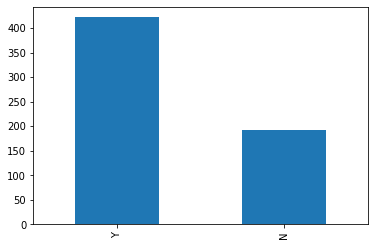

In [11]:
#Plotting the lOAN_STATUS as a bar plot

train['Loan_Status'].value_counts().plot.bar()



The loan of 422(around 69%) people out of 614 was approved.

<h3> Now we will analyze the Independent Variables of the train data (firstly categorical and ordinal) </h3>

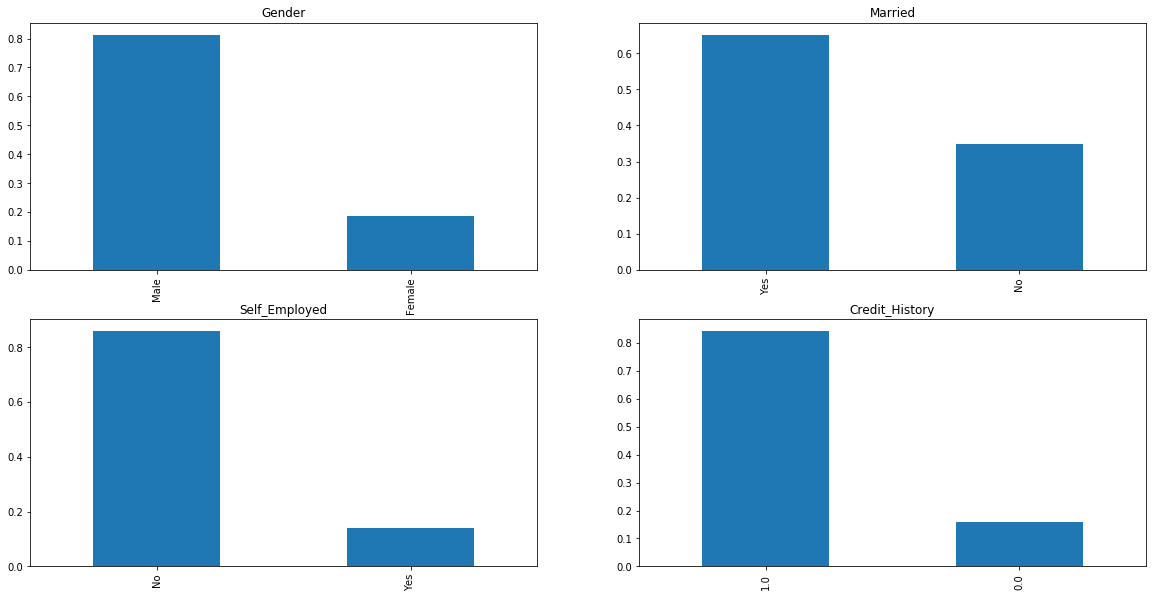

In [12]:
#Independent Variable(Categorical)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title ="Gender")


plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')


plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')


plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title ='Credit_History')

plt.show()


In [13]:
#Knowing the proportion of all the categorical data

train['Gender'].value_counts(normalize = True)


Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [14]:
train['Married'].value_counts(normalize=True)


Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [15]:
train['Self_Employed'].value_counts(normalize = True)


No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [16]:

train['Credit_History'].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

<h3> It can be inferred from the above bar plots that: </h3>
    
    -80% applicants in the dataset are male.
    -Around 65% of the applicants in the dataset are married
    -Around 15% applicants in the dataset are self employed.
    -Around 85% applicants have repaid their debts

<h3> Independent Variable (Ordinal) </h3>

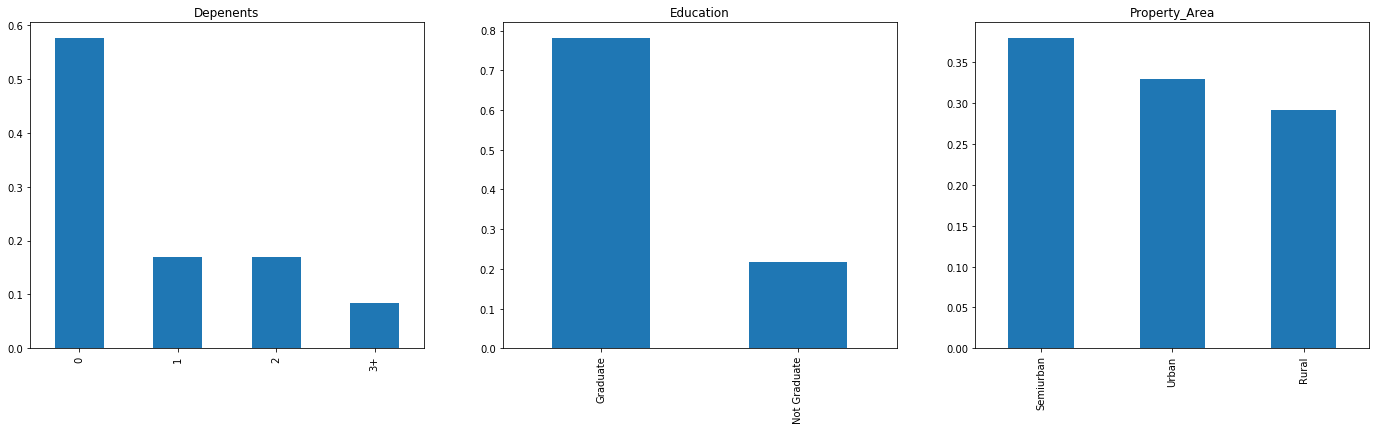

In [17]:
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Depenents')

plt.subplot(132)
train['Education'].value_counts(normalize= True).plot.bar(title ='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

plt.show()

<h3> Following inferences can be made from the above bar plots: </h3>
    
-Most of the applicants dont have any dependents.

-Around 80% of the applicants are Graduate

-Most of the applicants are from Semiurban area

<h3> Independent Variable (Numerical) </h3>

Now lets visualize the numerical variables. Lets look at the distribution of 
APPLICANT INCOME FIRST

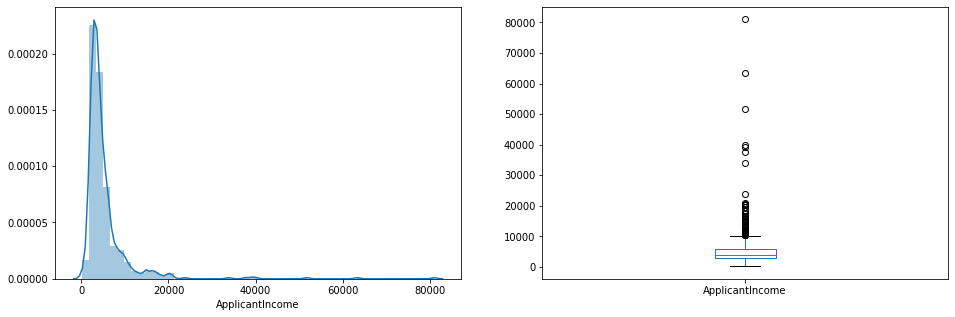

In [17]:
#Plotting the APPLICANT INCOME FIRST

plt.subplot(121)
#distplot is used to check how is the distribution
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of APPLICANT INCOME is towards left which means it is not normally distributed. 

We will try to make it normal in later sections as algoirthms works better if the data is normally distributed.

The BOXPLOT confirms the presence of a lot of outliers/extreme values.
(Mostly or Maybe) This can be attributed to the income difference(disparity) in the society. 
Part of this can be driven by the fact that we are looking at people with different education levels.



<h3> Let us segregate the Applicant Income by Education level. </h3>

Text(0.5, 0.98, '')

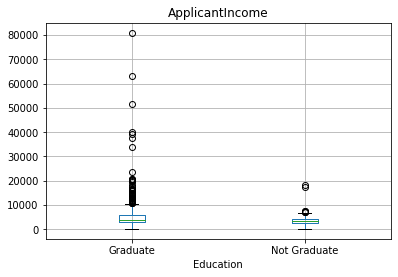

In [18]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

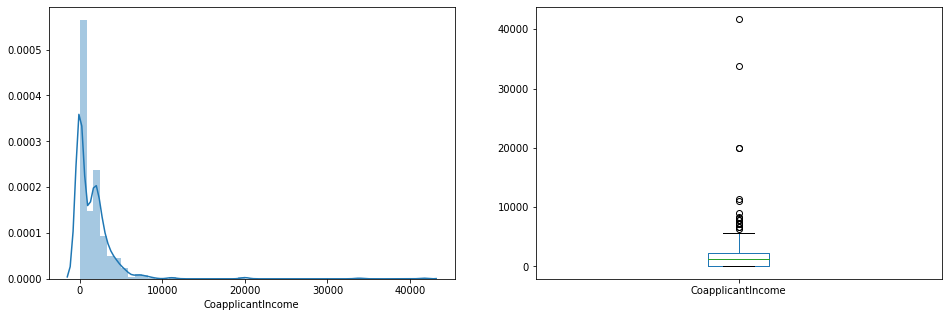

In [19]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

We see a similar distribution as that of the applicant Income. 
Majority of co-applicant income ranges from 0-5000.
We also see a lot of outliers in the coapplicant income and it is not normally distributed.

<h3> Lets look at the distribution of the LOAN AMOUNT variable </h3>

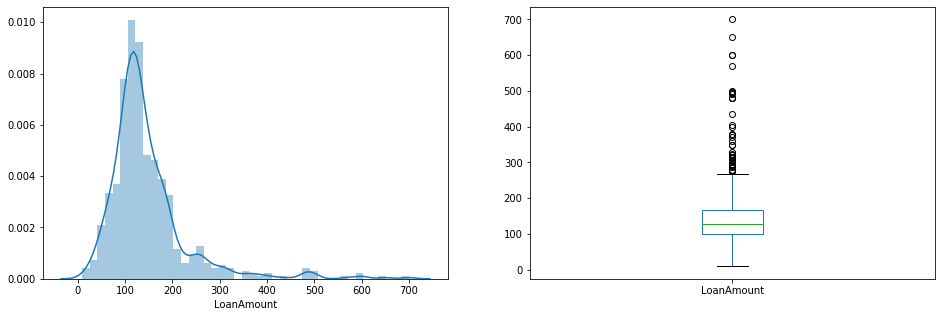

In [20]:
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);


plt.subplot(122) 
train['LoanAmount'].plot.box(figsize =(16,5))

plt.show()


We see a lot of outliers in this variable and the DISTRIBUTION is fairly NORMAL. We will treat the outliers in later sections.




Now we will figure out that how well each feature correlate with Loan Status.

So next we will do BIVARIATE ANALYSIS. 


<h3> BI-VARIATE ANALYSIS </h3>

<h3> Categorical Independent Variable vs Target Variable </h3>

First of all we will find the relation between TARGET and CATEGORICAL INDEPENDENT variables.

Let us look at the stacked bar plot now which will give us the proportion of APPROVED AND UNAPPROVED LOANS.

In [21]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])

In [22]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


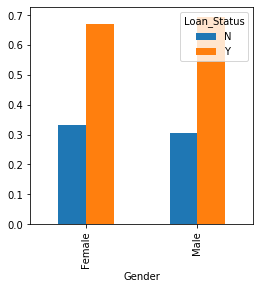

In [23]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind= "bar", stacked = False, figsize =(4,4))

It can be inferred that the PROPORTION of MALE AND FEMALE applicants is more or less same for both approved and unapproved loans.

<h3> Now let us visualize the remaining categorical variables vs target variable. </h3>

In [24]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])

In [25]:
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [26]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents 

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [27]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [28]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


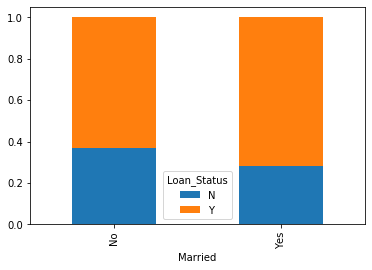

In [29]:
Married.div(Married.sum(1).astype(float), axis =0).plot(kind ="bar", stacked = True)
plt.show()

PROPORTION OF MARRIED APPLICANTS is HIGHER for the APPROVED LOANS.

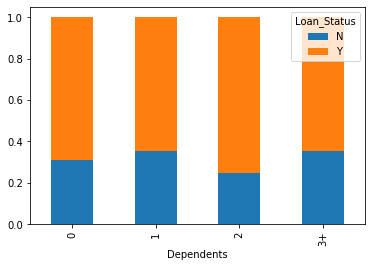

In [30]:
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan Status

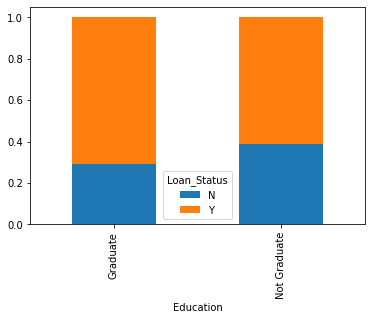

In [31]:
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind="bar", stacked = True)
plt.show()

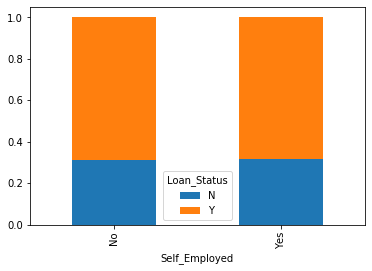

In [32]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

<h3> Now we  will look at the relationship between remaining categorical independent variables and Loan_Status </h3>

In [33]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [34]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


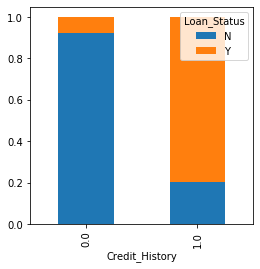

In [35]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

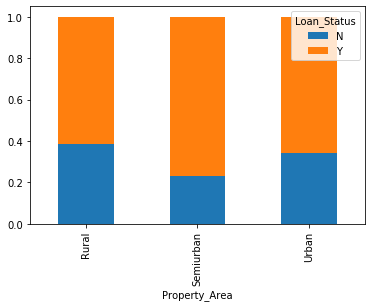

In [36]:
Property_Area.div(Property_Area.sum(1).astype(float), axis =0).plot(kind ="bar", stacked = True)

Proportion of loans getting approved in semiurban area is higHer as compared to that in RURAL OR URBAN AREAS. 

<h3> Numerical Independent Variable vs Target Variable </h3>

We will try to find the mean income of people for which the loan has been approved VS the mean income of people for which the loan has not been approved.


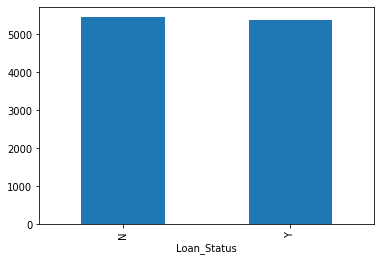

In [37]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant Income. We don't see any change in the mean income. 

<h3> Now lets make bins for the applicant income variable
    based on the values in it and analyze the corresponding loan status for each bin. </h3>

Text(0, 0.5, 'Percentage')

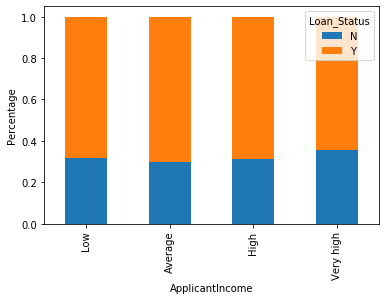

In [38]:
bins=[0,2500,4000,6000,8100]
group = ['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels = group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis =0).plot(kind = "bar", stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')




It can be inferred that Applicant Income does not affect the chances of loan approval WHICH CONTRADICTS our hypothesis in which we assumed that if the THE APPLICANT INCOME IS HIGH THE CHANCES OF LOAN APPROVAL WILL ALSO BE HIGH. 

We will analyze the coapplicant Income and loan amount variable in similar manner.

In [39]:
bins = [0,1000,3000,42000]
group =['Low','Average', 'High']

train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

Text(0, 0.5, 'Percentage')

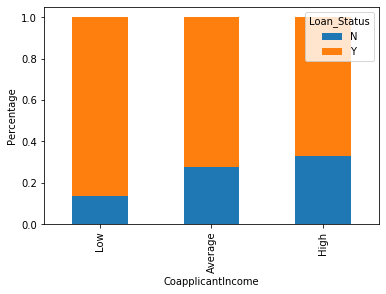

In [40]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant's income is less the chances of loan approval are high. But this does not look right.
The possible reason behind this maybe that most of the applicant have any coapplicant Income for such applicants is 0 and hence the loan appproval is not dependent on it.


So we can make a new variable in which we will combine the applicant and coapplicant Income to visualize the combine effect of income on LOAN APPROVAL

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status

Text(0, 0.5, 'Percentage')

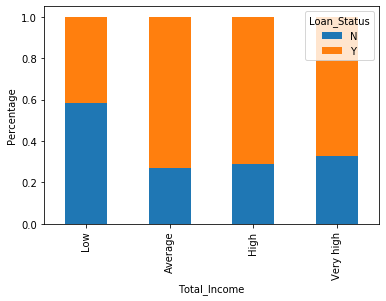

In [41]:
train['Total_Income'] = train['ApplicantIncome'] +train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low','Average', 'High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins, labels= group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind ="bar", stacked = True)

plt.xlabel('Total_Income')
plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average High and Very High Income.


LETS VISUALIZE THE LOAN AMOUNT VARIABLE.

Text(0, 0.5, 'Percentage')

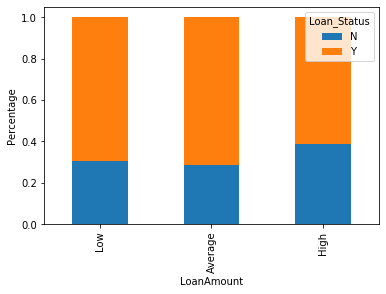

In [42]:
bins = [0,100,200,700] 
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels= group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)

plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can be seen that the proportion of APPROVED LOANS IS HIGHER FOR LOW AMOUNT as compared to that of high loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less

IMPORTANT STEPS:

-Lets drop the bins which we created for the EXPLORATION Part

-We will change the 3+ in dependents variable to 3 to make it a numerical variable.

-We will also convert the Target variable categories into 0 and 1 so that we can find its correlation with numerical variables.

-One more reason to do is few models like Logistic regression takes only numeric as input.

-We will replace N with 0 and Y with 1.



In [43]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'],axis =1)

train['Dependents'].replace('3+',3,inplace =True)
test['Dependents'].replace('3+', 3, inplace= True)
train['Loan_Status'].replace('N', 0, inplace =True)
train['Loan_Status'].replace('Y', 1, inplace = True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. 

HeatMAPS visualize data through variations in coloring. The variables with dark coloor means their correlation is more.

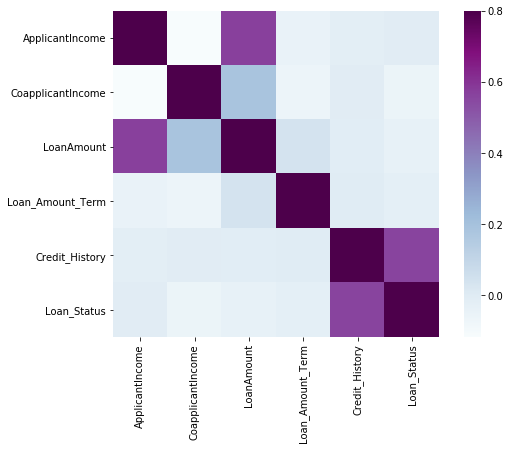

In [44]:
matrix = train.corr() 
f,ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square= True, cmap = "BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

LoanAmount is also correlated with CoapplicantIncome.

<h3> MISSING VALUES AND OUTLIER TREATMENT </h3>

Lets list out feature wise count of missing values

In [45]:
#It will tell the count of missing values in each variable in the train dataset

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We can consider these methods to fill the missing values:

<b> For numerical variables: </b> imputation using mean or median

<b> For categorical variables: </b> imputation using mode

There are very less missing values in GENDER, MARRIED, DEPENDENTS, CREDIT_HISTORY AND SELF EMPLOYED features so we can fill them using MODE OF THE FEATURES.

In [46]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

Now lets try to find a way to fill the missing values in LOAN_AMOUNT_TERM. 

We will look at the value count of the  LOAN AMOUNT term variable.

In [47]:
#counting how many times how many times each value occurs in Loan_Amount_Term

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. 

So we will replace the missing values in this variable using the mode of this variable

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace =True)

In [49]:
train['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [50]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [54]:
#Loan_Amount_term is period of time the loan needs to be approved for



Now we will see the LoanAmount variable. As its a numerical variable, we can use mean or median to impute the  missing values.

We will use the median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as its is highly affected by the presence of outliers.



In [51]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace =True)

Now  lets check whether all the missing values are filled in the dataset.

In [52]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in train dataset. 
Lets fill all the missing values in test dataset too with same approach.


In [53]:
#Same way we can fill the test dataset as we will filled the train one.

test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)



In [54]:
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

<h3> OUTLIER TREATMENT </h3>

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

Due to this outliers bulk of the data in the loan mount is at the left and right tail is longer. 

ONE WAY TO REMOVE THE SKEWNESS IS BY DOING THE LOG TRANSFORMATION. 
As we take the log transformation, IT DOES NOT AFFECT THE SMALLER VALUES MUCH ,BUT REDUCES LARGER VALUES.

So, we get a distribution similar to normal distribution.


Lets visualize the effect of log transformation. We will do the similar changes to test file simultaneously

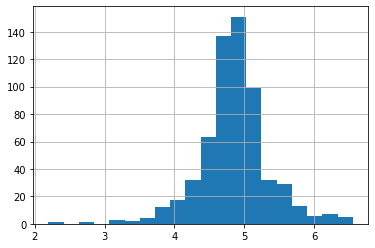

In [55]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly susided.


Lets build a logistic regression model and make prediction for the test dataset.

<h3> LOGISTIC REGRESSION </h3>


-Logistic regression is a classification algorithm.
-It is used to predict a binary outcome(1/0, Yes/No, True/False) given a set of independent variables.

-Logisitc regression is an estimation of Logit function. 
-Logit function is simply a log of odds in favor of the event. 

-This function creates a s-shaped curve with the probability estimate, which is very similar to the required stepwise function.

Lets drop the Loan_ID variable as it do not have any effect on the loan status.

We will do the same changes to the test dataset which we did for the training dataset.

In [56]:
train = train.drop('Loan_ID', axis =1)
test = test.drop('Loan_ID', axis=1)

-We will use scikit- learn (sklearn) for making making different models which is an open source library for Python.

-Its is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in python.

-SKLEARN REQUIRES THE TARGET VARIABLE IN A SEPERATE DATASET. SO WE WILL DROP OUR TARGET VARIABLE FROM THE TRAIN DATASET AND SAVE IT IN ANOTHER DATASET.

In [57]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

-Now we will make dummy variables for the categorical variables.
-Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:


->Consider the "Gender" variable. It has two classes, Male and Female.

-> As logistic regression,takes only numerical values as input, we have to change male and female into a numerical value.

->Once we apply dummies to this variable, it will convert the "Gender" variable into two variables (Gender_Male and Gender_Female),one for each class, ie. Male and Female.

->Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [58]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset.

BUT CAN WE VALIDATE THESE PREDICTIONS?

One way of doing this is we can divide our train dataset into two parts: TRAIN AND VALIDATION.

We can train the model on this train part and using that make prediction for the validation part.

In this way we can validate our predictions as we have the true predictions for the validation part(WHICH WE DO NOT HAVE FOR THE TEST DATASET).


We will use the train_test_split function from sklearn to divide our train dataset.

So first let us import train_test_split

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)


The dataset has been divided into training and validation part. Let us import LOGISTIC REGRESSION and ACCURACY_SCORE from sklearn and fit the logistic regression model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

Smaller values of C specify stronger regularization.

In [61]:
#Lets predict the Loan_Status for validation set and calculate its accuracy

pred_cv = model.predict(x_cv)



So our predictions are almost 80% accurate that  is we have indentified 82% of the loan status correctly

Lets make predictions for the test dataset

In [62]:
accuracy_score(y_cv, pred_cv)

0.7837837837837838

In [64]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker 

In [65]:
submission = pd.read_csv(r"C:\Users\Lonakshi Bhagat\Desktop\projects\sample_submission.csv")

In [66]:
submission['Loan_Status'] = pred_test

In [67]:
submission['Loan_ID'] = test_original['Loan_ID']

In [68]:
submission['Loan_Status'].replace(0, 'N', inplace = True)

In [69]:
submission['Loan_Status'].replace(1, 'Y', inplace = True)